# Sequential

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import class_weight

In [37]:
# Get data
df = pd.read_csv("/Users/bilge.karaca/python-wd/2_ev-time_deep-learning/playground-series-s3e23/train.csv")
#df.defects = np.where(df.defects==True,1,0)
df.drop(["n","v","b","total_Opnd","v(g)", "id"],inplace=True,axis=1)

In [38]:
X = df.drop("defects",axis=1)
y = df["defects"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
def logOrSqrtTransform(df):
    
    """
    Apply sqrt transformation if the column has zero values.
    Apply log transformation if the column has no zeroes.
      
    """
    
    if "defects" in df.columns:
        df = df.drop("defects", axis=1)
        
    a = {}
    
    for col in df.columns:
        if df[col].isin([0]).any() == False:
            a[col] = np.log(df[col])
            print("Log transformation applied")
        else:  
            a[col] = np.sqrt(df[col])
            print("Sqrt transformation applied")
            
    df_transformed = pd.DataFrame(a)
    if "defects" in df.columns:
        df_transformed["defects"] = df.defects
    
    return df_transformed

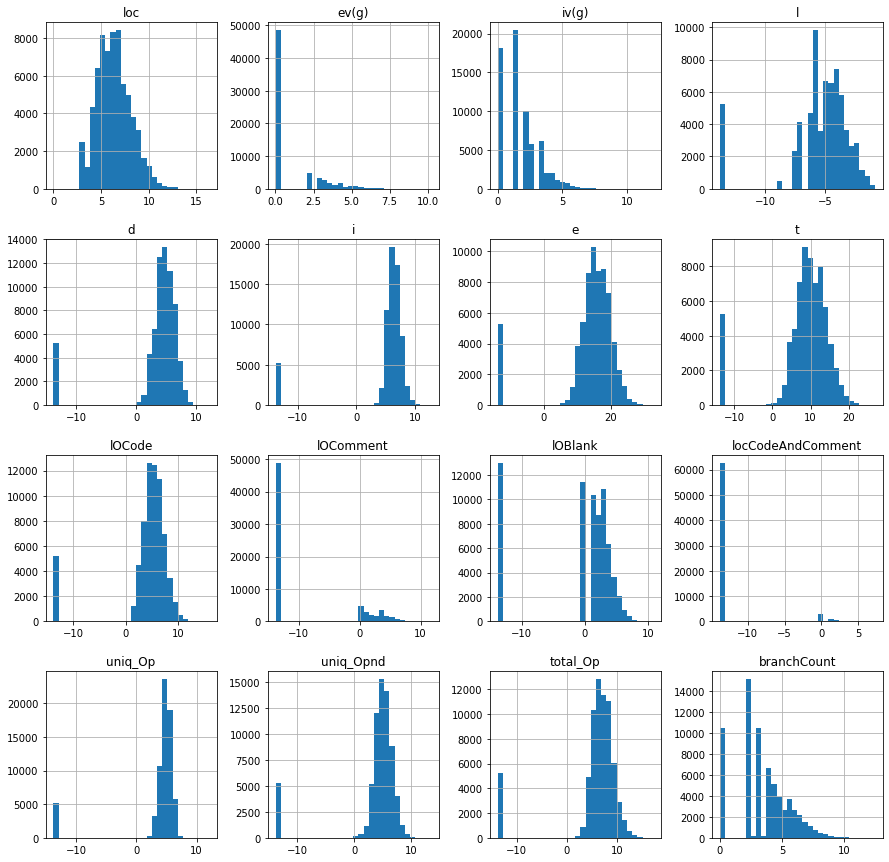

In [6]:
eps=0.001
np.log(np.square(X_train+eps)).hist(figsize=[15,15], bins=30);

In [7]:
X_train = np.log(np.square(X_train+eps))

In [8]:
X_test = np.log(np.square(X_test+eps))

In [9]:
X_train

,loc,ev(g),iv(g),l,d,i,e,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,branchCount
27997,3.219276,0.001999,0.001999,-1.637421,1.657977,5.959307,10.052505,4.270935,2.197891,-13.815511,-13.815511,-13.815511,2.773089,3.892106,4.394671,0.001999
99024,4.394671,2.197891,0.001999,-4.396450,4.458092,5.338757,14.252337,8.471717,3.583852,-13.815511,0.001999,-13.815511,4.605370,3.892106,6.089140,3.892106
29883,2.773089,0.001999,0.001999,-1.827588,1.833381,5.322057,8.534382,2.752993,1.387294,-13.815511,-13.815511,-13.815511,3.219276,2.773089,3.219276,2.197891
8850,7.475387,3.892106,2.773089,-5.951859,5.991565,7.085452,19.179150,13.397426,7.052780,-13.815511,2.773089,-13.815511,5.545302,6.089140,8.608157,5.130053
51221,6.734661,2.197891,1.387294,-4.793792,4.786862,6.890492,16.534364,10.753619,6.182176,-13.815511,3.219276,-13.815511,5.130053,5.888983,7.522447,3.219276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,8.120921,2.197891,3.892106,-6.388366,6.532358,6.969299,19.781914,14.001181,7.427193,2.197891,2.773089,3.892106,5.780855,6.089140,9.307940,5.416234
54886,8.221781,3.219276,3.583852,-5.951859,5.822635,7.584271,19.019174,13.238442,7.427193,4.159133,4.969980,-13.815511,5.666544,6.356191,8.954696,5.416234
76820,5.545302,2.197891,0.001999,-4.065116,4.432093,5.146903,13.603102,7.822485,4.795972,-13.815511,2.197891,-13.815511,4.795972,3.583852,5.416234,3.892106
860,5.666544,0.001999,1.387294,-3.532183,3.533225,6.701281,13.611425,7.830874,5.278258,-13.815511,0.001999,-13.815511,4.394671,5.130053,6.182176,2.197891


In [10]:
X_train = X_train.apply(lambda x: np.where(x<=-10, np.nan, x))

In [11]:
X_test = X_test.apply(lambda x: np.where(x<=-10, np.nan, x))

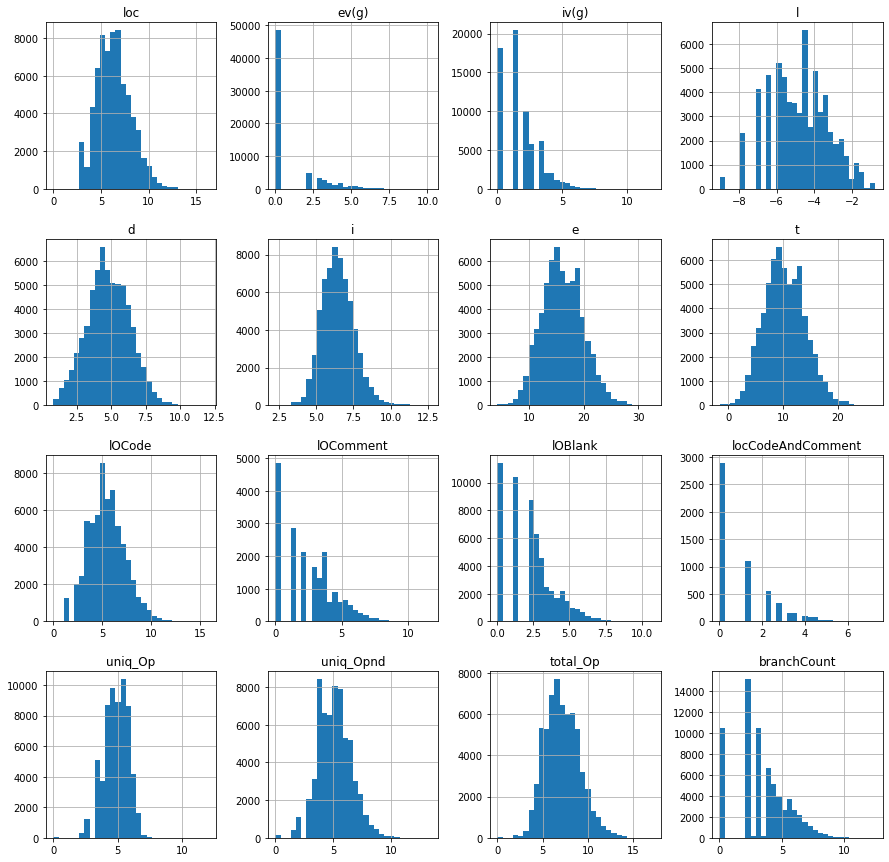

In [54]:
X_train.hist(figsize=[15,15], bins=30);

In [61]:
import pickle
handle = open('ann_obj_data.p', 'wb')
pickle.dump(obj, handle)

In [59]:
obj = [X_train_sub, y]

In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.to_numpy())
X_test_scaled = scaler.transform(X_test.to_numpy())


imputer = SimpleImputer(strategy="median")

X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

In [15]:
weights= class_weight.compute_class_weight(class_weight='balanced', classes = np.unique(y_train), y= y_train)
weights

array([0.64723472, 2.19796905])

In [16]:
weights_dict = dict(enumerate(weights))
weights_dict

{0: 0.6472347211938259, 1: 2.1979690522243716}

## Architecture

In [17]:
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=[keras.metrics.AUC()])


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=20, 
                    batch_size=516, 
                    validation_data=(X_test_scaled,y_test),
                    class_weight=weights_dict
                   )

Epoch 1/20


2023-10-08 15:58:13.099429: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


133/133 [==============================] - 0s 1ms/step - loss: 0.6167 - auc: 0.7208 - val_loss: 0.5842 - val_auc: 0.7694
Epoch 2/20
133/133 [==============================] - 0s 666us/step - loss: 0.5765 - auc: 0.7688 - val_loss: 0.5714 - val_auc: 0.7768
Epoch 3/20
133/133 [==============================] - 0s 661us/step - loss: 0.5694 - auc: 0.7752 - val_loss: 0.5642 - val_auc: 0.7801
Epoch 4/20
133/133 [==============================] - 0s 646us/step - loss: 0.5654 - auc: 0.7791 - val_loss: 0.5483 - val_auc: 0.7820
Epoch 5/20
133/133 [==============================] - 0s 646us/step - loss: 0.5622 - auc: 0.7822 - val_loss: 0.5514 - val_auc: 0.7832
Epoch 6/20
133/133 [==============================] - 0s 645us/step - loss: 0.5609 - auc: 0.7829 - val_loss: 0.5567 - val_auc: 0.7840
Epoch 7/20
133/133 [==============================] - 0s 652us/step - loss: 0.5605 - auc: 0.7835 - val_loss: 0.5585 - val_auc: 0.7846
Epoch 8/20
133/133 [==============================] - 0s 652us/step - loss:

In [18]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])

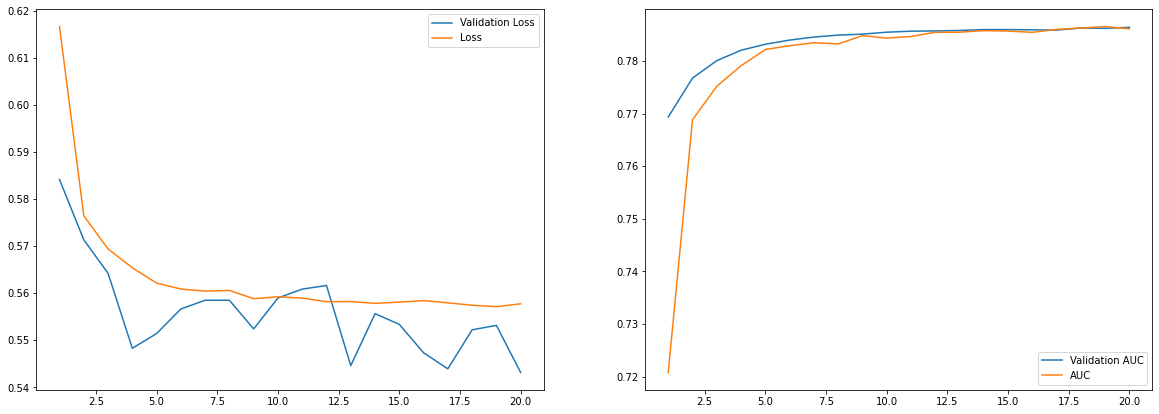

In [20]:
val_loss_values = hist_dict["val_loss"]
loss_values = hist_dict["loss"]
val_auc_values = hist_dict["val_auc"]
auc_values = hist_dict["auc"]
epochs = range(1,len(auc_values)+1)



import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))

plt.subplot(121)
plt.plot(epochs, val_loss_values, label = "Validation Loss")
plt.plot(epochs, loss_values, label = "Loss")
plt.legend()

plt.subplot(122)
plt.plot(epochs, val_auc_values, label = "Validation AUC")
plt.plot(epochs, auc_values, label = "AUC")
plt.legend()


plt.show();

In [21]:
results = model.evaluate(X_test_scaled, y_test)

1050/1050 [==============================] - 0s 285us/step - loss: 0.5432 - auc: 0.7864


### Export

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [42]:
X_train_sub = np.log(np.square(X+eps))

X_train_sub = X_train_sub.apply(lambda x: np.where(x<=-10, np.nan, x))


scaler = StandardScaler()

X_train_sub_scaled = scaler.fit_transform(X_train_sub.to_numpy())


imputer = SimpleImputer(strategy="median")

X_train_sub_scaled = imputer.fit_transform(X_train_sub_scaled)




In [40]:
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=[keras.metrics.AUC()])


history = model.fit(X_train_sub_scaled, 
                    y, 
                    epochs=20, 
                    batch_size=516, 
                    class_weight=weights_dict
                   )

Epoch 1/20
198/198 [==============================] - 0s 451us/step - loss: 0.6163 - auc_4: 0.7207
Epoch 2/20
198/198 [==============================] - 0s 438us/step - loss: 0.5750 - auc_4: 0.7696
Epoch 3/20
198/198 [==============================] - 0s 447us/step - loss: 0.5671 - auc_4: 0.7771
Epoch 4/20
198/198 [==============================] - 0s 444us/step - loss: 0.5651 - auc_4: 0.7787
Epoch 5/20
198/198 [==============================] - 0s 461us/step - loss: 0.5637 - auc_4: 0.7797
Epoch 6/20
198/198 [==============================] - 0s 455us/step - loss: 0.5625 - auc_4: 0.7807
Epoch 7/20
198/198 [==============================] - 0s 452us/step - loss: 0.5612 - auc_4: 0.7818
Epoch 8/20
198/198 [==============================] - 0s 451us/step - loss: 0.5617 - auc_4: 0.7815
Epoch 9/20
198/198 [==============================] - 0s 464us/step - loss: 0.5603 - auc_4: 0.7827
Epoch 10/20
198/198 [==============================] - 0s 508us/step - loss: 0.5603 - auc_4: 0.7827
Epoch 11/

In [43]:
test_sub = pd.read_csv("/Users/bilge.karaca/python-wd/2_ev-time_deep-learning/playground-series-s3e23/test.csv")

test_sub_id = test_sub["id"]
test_sub.drop(["n","v","b","total_Opnd","v(g)", "id"],inplace=True,axis=1)



test_sub = np.log(np.square(test_sub+eps))

test_sub = test_sub.apply(lambda x: np.where(x<=-10, np.nan, x))


test_sub = scaler.transform(test_sub.to_numpy())



test_sub = imputer.transform(test_sub)

In [45]:
y_pred = model.predict(test_sub)

2121/2121 [==============================] - 0s 226us/step


In [52]:
y_pred = y_pred.flatten()

In [53]:
subm = pd.DataFrame({"id": test_sub_id , "defects": y_pred})

subm.to_csv("01_Seq.csv",header=True, index=False)